In [ ]:
root_dir = "/content/drive/MyDrive/ITA/Seocho_23/Code/"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
dtc = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
dtc.fit(X_train, y_train)
yhat = dtc.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=600)
# figsize 기본값 (6.4, 4.8) -> 크게 그리고 싶으면 늘리세요
# dots per inch / pixels per inch
# dpi 기본값 100.0 -> 선명하고 그리고 싶으면 늘리세요
plot_tree(dtc, filled=True)

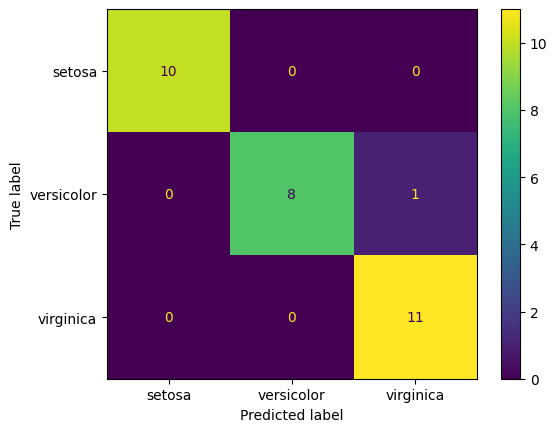

In [ ]:
cm = confusion_matrix(y_test, yhat)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["setosa", "versicolor", "virginica"])
# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(iris.target)))
cm_display.plot()

In [ ]:
# coffee data 로 수업에서 (df_arabica_clean.csv)
# netflix revenue 숙제로
from sklearn.tree import DecisionTreeRegressor
df_coffee = pd.read_csv(root_dir + "df_arabica_clean.csv")
df_coffee

In [ ]:
df_coffee.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [ ]:
# aroma부터 balance까지 적절한 갯수의 feature 골라서
# overall값을 regression 해보자
# criterion="absolute_error"

# 튜닝 방법
# feature 갯수를 늘리면 -> max_depth 또는 max_leaf_nodes를 늘리자
# feature의 분산이 더 크다 -> max_depth 또는 max_leaf_nodes를 늘리자
# 학습 단계에서 mae가 너무 커요 -> max_depth 또는 max_leaf_nodes를 늘리자
# 학습 단계 mae에 비해서 검증 단계 mae가 너무 커요 (오버피팅 의심) -> max_depth 또는 max_leaf_nodes를 줄이자

In [ ]:
len(df_coffee)

207

In [ ]:
df_coffee["Overall"].describe()

count    207.000000
mean       7.676812
std        0.306359
min        6.670000
25%        7.500000
50%        7.670000
75%        7.920000
max        8.580000
Name: Overall, dtype: float64

In [ ]:
X = df_coffee[["Acidity", "Body"]].values
y = df_coffee["Overall"].values
dtr = DecisionTreeRegressor(max_depth=2, random_state=42, criterion="absolute_error")
maes = cross_val_score(dtr, X, y, cv=5, scoring="neg_mean_absolute_error")
# neg, 즉 negated가 굳이 붙은 이유:
# scoring에 인자로 들어오는 지표가 뭐든간에
# "높으면 좋다"라는 사실을 일관되게 반영하기 위해서
print(maes.mean())

-0.21699186991869918


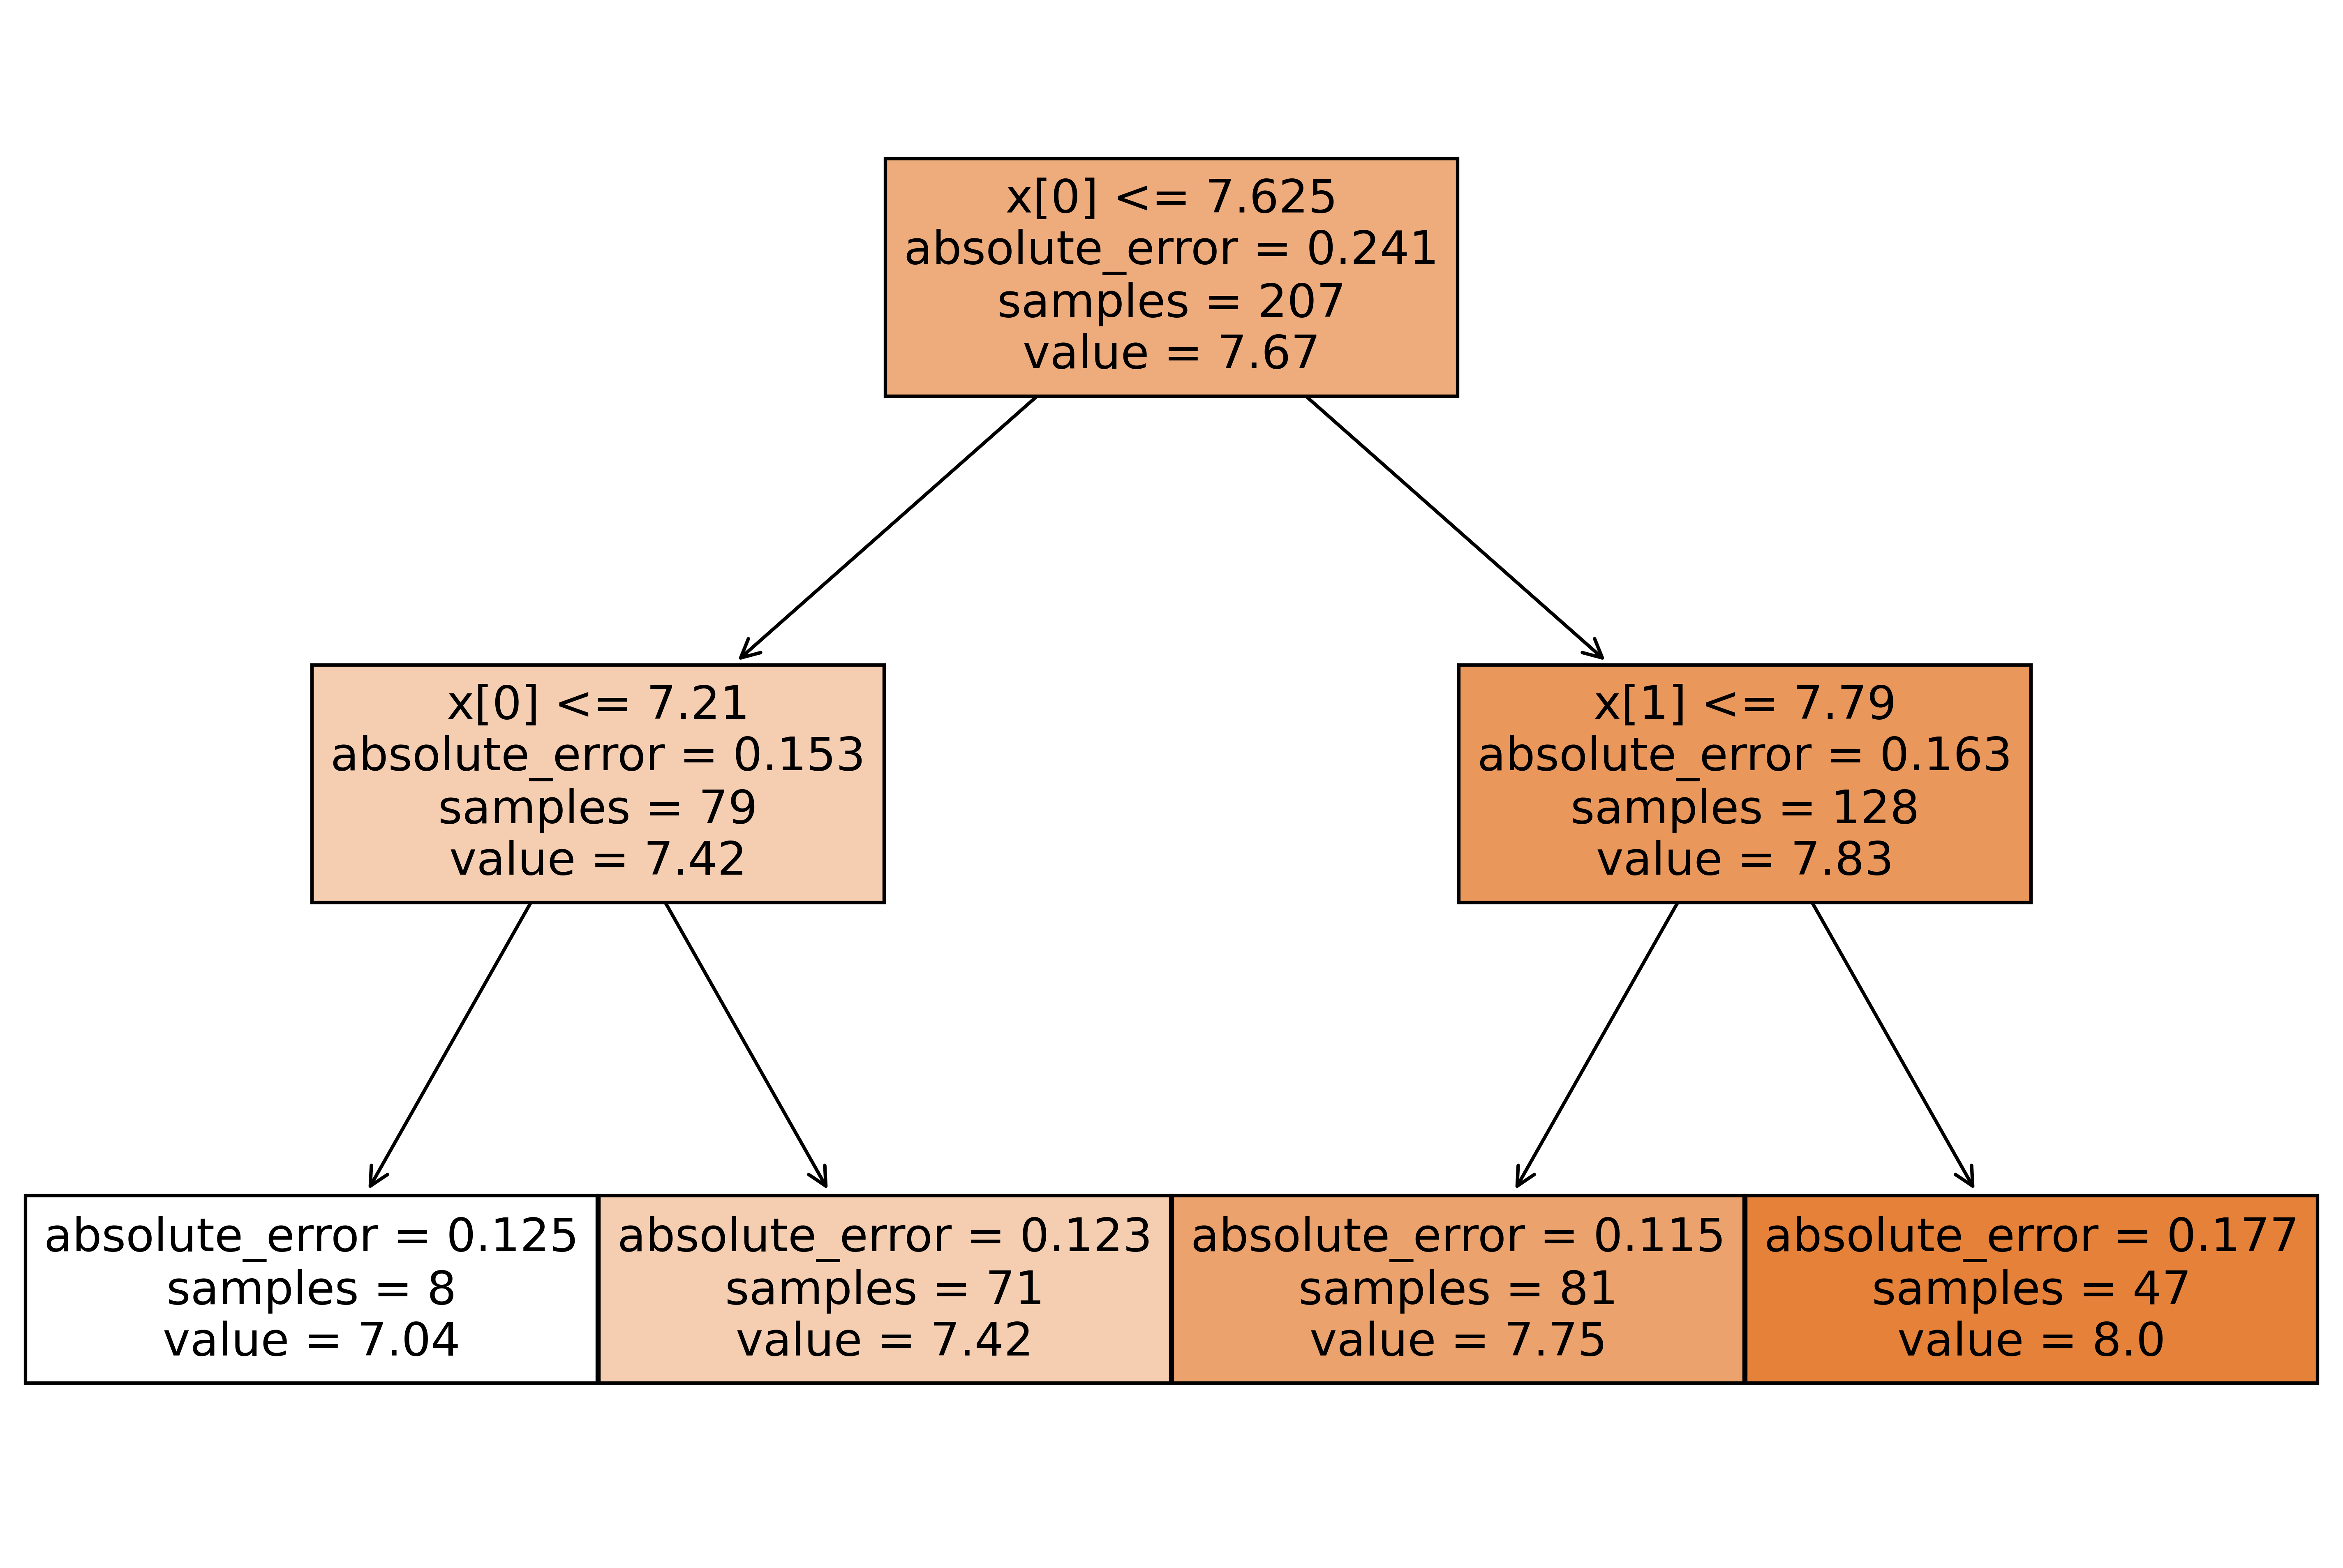

In [ ]:
dtr.fit(X, y)
fig = plt.figure(figsize=(12, 8), dpi=600)
plot_tree(dtr, filled=True)
plt.show()

In [ ]:
# 앙상블 모델 / 랜덤 포레스트
# 분류 회귀 둘 다 풀 수 있음
# 아래에서는 분류

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
df_health = pd.read_csv(root_dir + "data_health.csv")
df_health["heart_disease"].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [ ]:
df_health

In [ ]:
df_health.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# age, hypertension, avg_glucose_level, bmi, stroke
# 중 적절한 feature들을 골라서
# heart_disease 분류해보자

In [ ]:
from sklearn.preprocessing import StandardScaler
df_health = df_health.dropna()
X = df_health[["age", "avg_glucose_level", "bmi"]].values
X = StandardScaler().fit_transform(X.astype(float))
y = df_health["heart_disease"].values

In [ ]:
# data_health.csv에서 heart_disease 분류 재도전! (앙상블 모델로)
seed = 42
knnc = KNeighborsClassifier(n_neighbors=5)
svc = SVC(C=5, random_state=seed, class_weight="balanced")
lrc = LogisticRegression(random_state=seed, class_weight="balanced")
dtc = DecisionTreeClassifier(max_depth=5, random_state=seed, class_weight="balanced")
rfc = RandomForestClassifier(max_depth=10, n_estimators=500, random_state=seed, class_weight="balanced")



In [ ]:
vc = VotingClassifier(
    estimators=[("KNN", knnc), ("SVM", svc), ("LR", lrc), ("DT", dtc), ("RF", rfc)],
    weights=[1, 1, 1, 1, 1]
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
vc.fit(X_train, y_train)
yhat = vc.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       927
           1       0.20      0.82      0.32        55

    accuracy                           0.80       982
   macro avg       0.59      0.81      0.60       982
weighted avg       0.94      0.80      0.85       982



In [ ]:
cls = [knnc, svc, lrc, dtc, rfc]
for cl in cls:
  cl.fit(X_train, y_train)
  yhat = cl.predict(X_test)
  print(cl.__class__.__name__, "\n", classification_report(y_test, yhat))

KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       927
           1       0.12      0.02      0.03        55

    accuracy                           0.94       982
   macro avg       0.53      0.51      0.50       982
weighted avg       0.90      0.94      0.92       982

SVC 
               precision    recall  f1-score   support

           0       0.99      0.68      0.81       927
           1       0.14      0.91      0.25        55

    accuracy                           0.69       982
   macro avg       0.57      0.79      0.53       982
weighted avg       0.94      0.69      0.78       982

LogisticRegression 
               precision    recall  f1-score   support

           0       0.99      0.74      0.85       927
           1       0.17      0.85      0.28        55

    accuracy                           0.75       982
   macro avg       0.58      0.80      0.56       982
weighted avg       0.94 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Saving figure decision_tree_without_and_with_bagging_plot


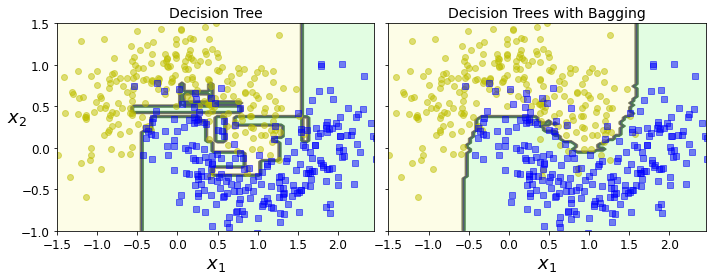

In [ ]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

# 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

랜덤 포레스트는 한 백(bag)의 의사 결정 나무와 동치입니다

---


In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [ ]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions

1.0

# 부스팅
## 에이다부스트

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

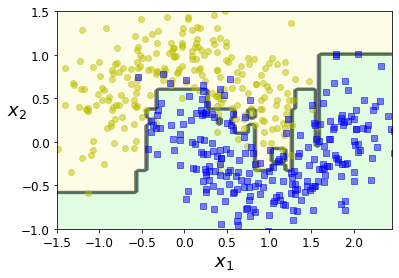

In [ ]:
plot_decision_boundary(ada_clf, X, y)

Saving figure boosting_plot


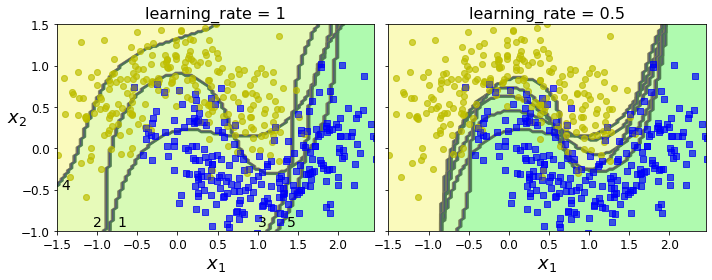

In [ ]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m) # 설명
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r) # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-3
        sample_weights /= sample_weights.sum() # normalization step

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

save_fig("boosting_plot")
plt.show()




